### Gorle Manasa
### TheSparkFoundation GRIPMAY2021
### Task-2 Prediction using Unsupervised ML


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot, plot

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
data =  pd.read_csv('Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.rename(columns={'SepalLengthCm': 'sepallength','SepalWidthCm': 'sepalwidth', 
                     'PetalLengthCm': 'petallength','PetalWidthCm':'petalwidth','Species':'species'}, inplace=True)

In [6]:
data.drop('Id', inplace=True, axis=1)

In [7]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

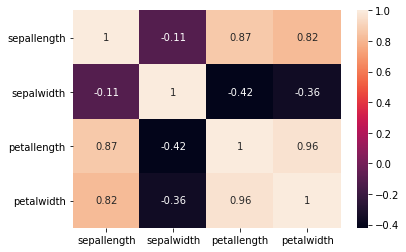

In [9]:
sns.heatmap(data.corr(), annot=True)

In [10]:
px.scatter(data, x = 'sepalwidth', y= 'sepallength', color='species', template='xgridoff')

### Different iris flowers are segregated by the sepal length, sepal width, petal  length and petal width 

#### range of all the dimmentions constitute a certain type of flower

In [11]:
 px.scatter(data, x="sepalwidth", y="sepallength", color="species", trendline="lowess", template='plotly_dark')

In [12]:
 px.scatter(data, x="petalwidth", y="petallength", color="species", trendline="lowess", template='plotly_dark')

In [13]:
px.density_heatmap(data, x="sepalwidth", y="sepallength", marginal_x="rug", marginal_y="histogram")

In [14]:
px.density_heatmap(data, x="petalwidth", y="petallength", marginal_x="rug", marginal_y="histogram")

In [15]:
px.scatter_ternary(data, a="sepallength", b="sepalwidth", c="petallength", color="species", 
                   size_max=15)

In [16]:
px.scatter(data,'species','sepallength')

In [17]:
px.scatter(data,'species','sepalwidth')

In [18]:
px.scatter(data,'species','petalwidth')

In [19]:
px.scatter(data,'species','petallength')

In [20]:
px.scatter_matrix(data, color='species', title= 'IRIS_Visualization', dimensions= ['sepallength','sepalwidth','petallength','petalwidth'])

In [21]:
x = data.drop('species', axis=1)

In [22]:
from sklearn.cluster import KMeans


C:\Users\SriVa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



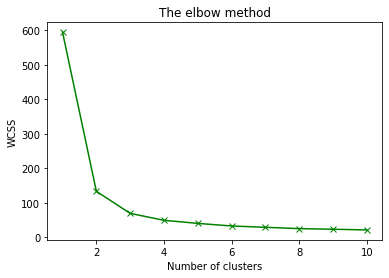

In [23]:
 
#wcss - within cluster sum of squares
x=data.iloc[:,0:3].values

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 400, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    

plt.plot(range(1, 11), wcss,'bx-', color = 'g')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From the above elbow diagram we cn say the best number of clusters are ranging from 2 to 3 
#### Here i will take 3 clusters 

In [24]:
#Apply kmeans classifier 
km = KMeans(n_clusters=3, init ='k-means++',
           max_iter=400, n_init=10,random_state=0)
y_km = km.fit_predict(x)

In [25]:
km.cluster_centers_

array([[5.84655172, 2.73275862, 4.3637931 ],
       [5.006     , 3.418     , 1.464     ],
       [6.83571429, 3.06428571, 5.6547619 ]])

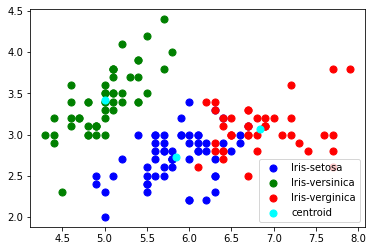

In [26]:
#Visualize first two clusters
plt.scatter(x[y_km == 0,0], x[y_km == 0,1], c='b', s= 50, label = 'Iris-setosa' )
plt.scatter(x[y_km == 1,0], x[y_km == 1,1], c='g', s= 50, label = 'Iris-versinica' )
plt.scatter(x[y_km == 2,0], x[y_km == 2,1], c='r', s= 50, label = 'Iris-verginica' )
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'cyan', s = 50, label = 'centroid')
plt.legend()

# Thank you